In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model     import LogisticRegression


from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer





sklearn.__version__

'0.24.2'

In [2]:
print('01. 데이터 로드 - ')
titanic_frm = pd.read_csv('/Users/choijaewoo/ml-data/titanic_train.csv')
titanic_frm.head()

01. 데이터 로드 - 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print('02. 결측값 처리 : Age -> 평균 , Cabin Embarked -> N ')
print('missingno 확인 및 처리 - ')
print('SimpleImputer 사용가능 - ')

02. 결측값 처리 : Age -> 평균 , Cabin Embarked -> N 
missingno 확인 및 처리 - 
SimpleImputer 사용가능 - 


<AxesSubplot:>

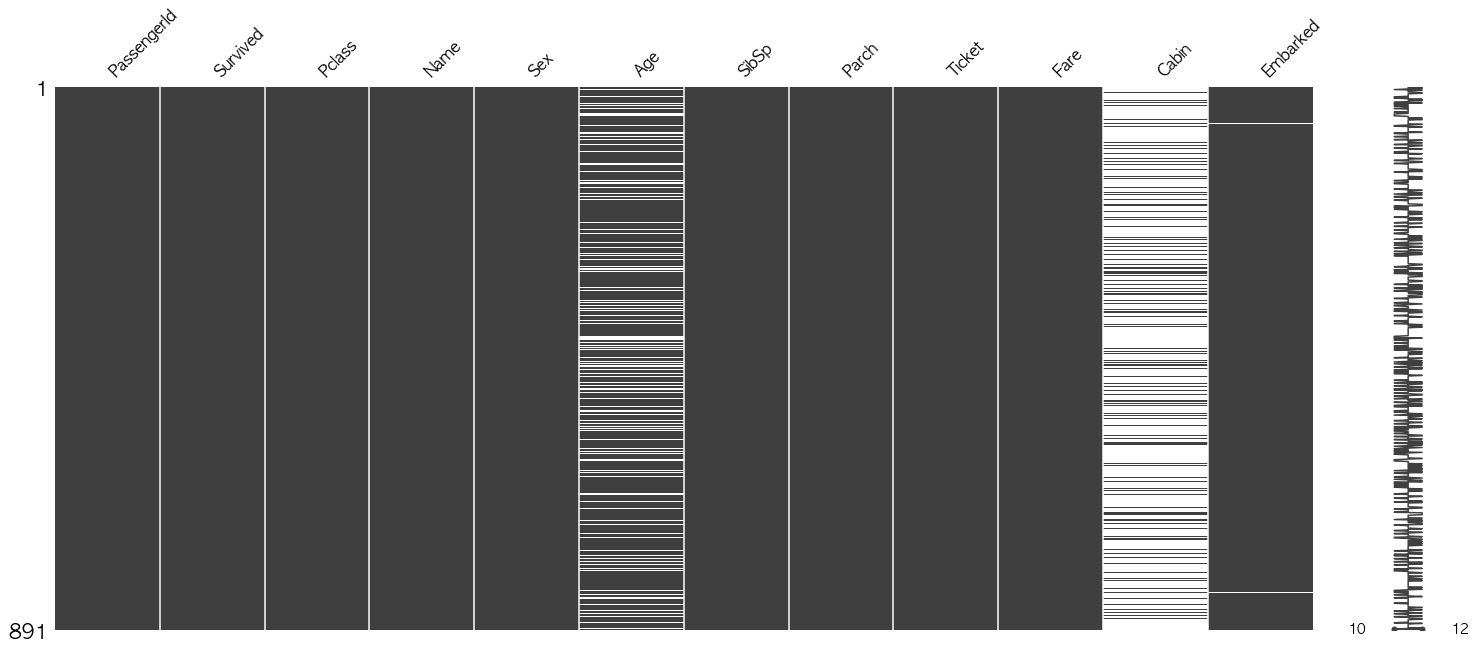

In [5]:
msno.matrix(titanic_frm)

<AxesSubplot:>

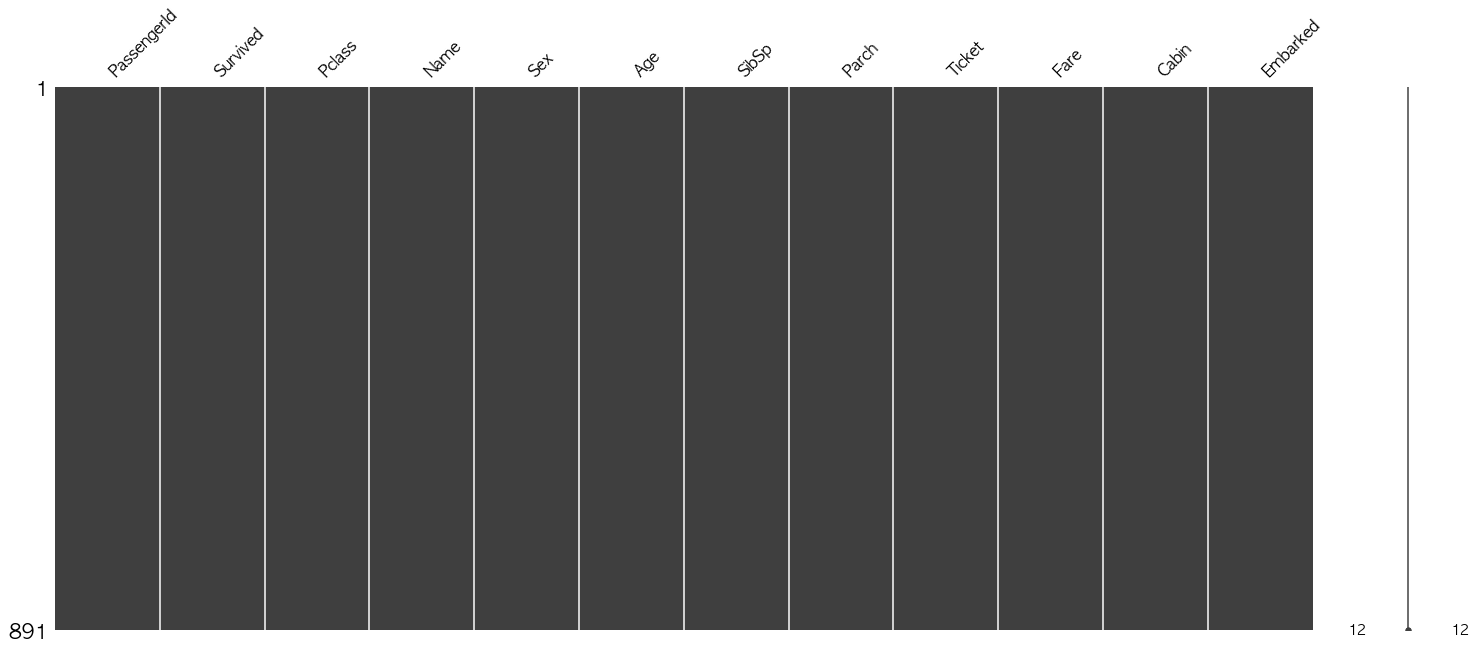

In [6]:
titanic_age_imputer = SimpleImputer(strategy='mean')

titanic_frm['Age'] = titanic_age_imputer.fit_transform(titanic_frm[['Age']])

titanic_frm['Cabin'] = titanic_frm['Cabin'].fillna('N')
titanic_frm['Embarked'] = titanic_frm['Embarked'].fillna('N')
msno.matrix(titanic_frm)

In [7]:
print('EDA - ')
print('03. 성별에 따른 생존여부 확인을 위한 barplot 시각화(seaborn) - ')
print('성별에따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적')
print('subplot - (1,3)')


EDA - 
03. 성별에 따른 생존여부 확인을 위한 barplot 시각화(seaborn) - 
성별에따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적
subplot - (1,3)


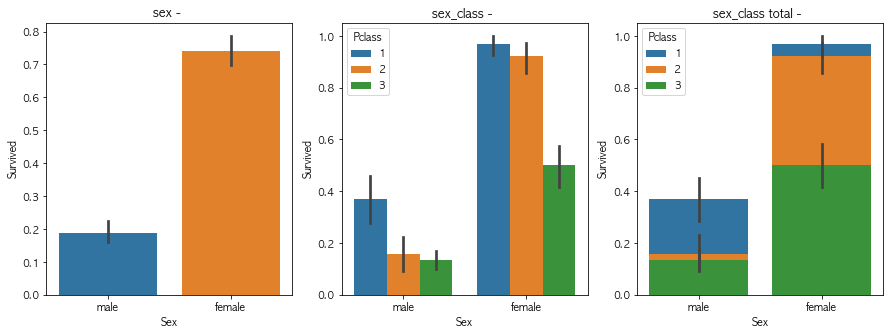

In [8]:
fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('sex - ')
ax02.set_title('sex_class - ')
ax03.set_title('sex_class total - ')

sns.barplot(ax = ax01, data = titanic_frm, x = 'Sex', y='Survived')

sns.barplot(ax = ax02, data = titanic_frm, x = 'Sex', y='Survived', hue = 'Pclass')

sns.barplot(ax = ax03, data = titanic_frm, x = 'Sex', y='Survived', hue = 'Pclass', dodge = False)


plt.show()
plt.close()

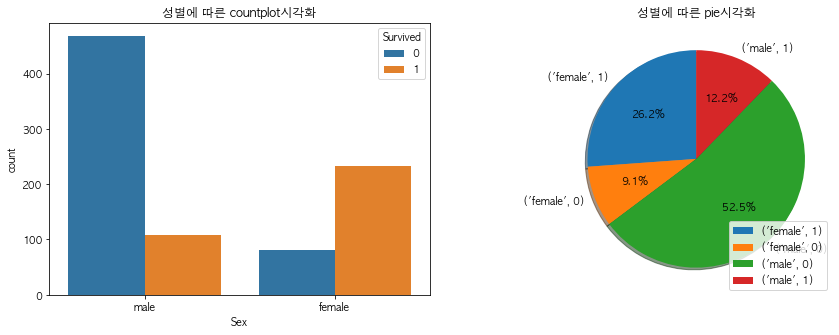

In [9]:
fig= plt.figure(figsize=(15,5))
ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

sns.countplot(ax=ax01, data=titanic_frm, x='Sex',hue='Survived')

ax02.pie(titanic_frm.groupby('Sex')['Survived'].value_counts(),
         labels     = titanic_frm.groupby('Sex')['Survived'].value_counts().index,
         autopct    = '%1.1f%%',
         startangle = 90 ,
         shadow     = True
        )

ax01.set_title('성별에 따른 countplot시각화')
ax02.set_title('성별에 따른 pie시각화')


plt.legend(loc='best')

plt.show()
plt.close()


In [10]:
print('EDA - ')
print('04. 성별에 따른 생존자 수를 수치로 비교 - groupby ')

titanic_frm.groupby(['Sex' , 'Survived'])['Survived'].count().to_frame()

EDA - 
04. 성별에 따른 생존자 수를 수치로 비교 - groupby 


Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [11]:
print('04. Age , Cabin , Embarked 값의 분포 - value_counts() ')
print()
print('Sex - ')
print(titanic_frm['Sex'].value_counts() )
print()
print('Cabin - ')
print(titanic_frm['Cabin'].value_counts() )
print()
print('Embarked - ')
print(titanic_frm['Embarked'].value_counts() )

04. Age , Cabin , Embarked 값의 분포 - value_counts() 

Sex - 
male      577
female    314
Name: Sex, dtype: int64

Cabin - 
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked - 
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [12]:
print('05. Cabin 첫 번재 글자가 좌석등급을 의미하므로 첫 글자만 추출해서 반영 - ')
titanic_frm['Cabin'] = titanic_frm['Cabin'].str[:1]

05. Cabin 첫 번재 글자가 좌석등급을 의미하므로 첫 글자만 추출해서 반영 - 


In [13]:
print('Cabin - ')
print(titanic_frm['Cabin'].value_counts() )

Cabin - 
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [14]:
print('06. 나이에 따른 연령층 분류해서 새로운 피처(Age_Category)를 추가 - ')
titanic_frm['Age_Category'] = ( (titanic_frm['Age'] // 10) * 10 ).astype(int)

06. 나이에 따른 연령층 분류해서 새로운 피처(Age_Category)를 추가 - 


In [15]:
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,30
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,10
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,20
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,20


07. 연령대에 따른 성별 생존 확률 시각화 - barplot 


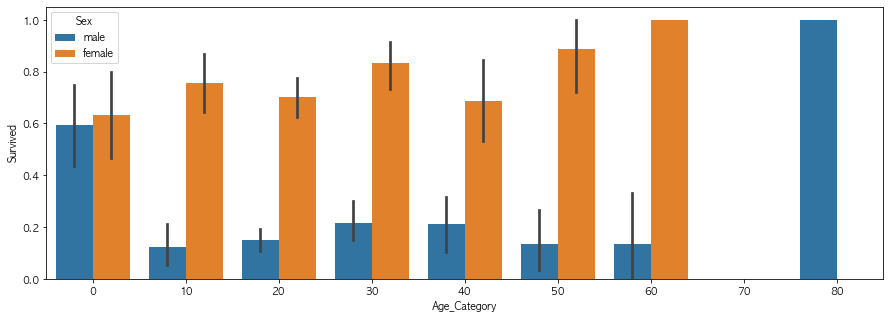

In [16]:
print('07. 연령대에 따른 성별 생존 확률 시각화 - barplot ')

fig= plt.figure(figsize=(15,5))

sns.barplot(data = titanic_frm ,
            x    = 'Age_Category' ,
            y    = 'Survived' ,
            hue  = 'Sex')

plt.show()
plt.close()

In [17]:
titanic_subset_frm = titanic_frm[['Survived' , 'Pclass' , 'Sex' , 'Age_Category' , 'Cabin' , 'Embarked']]
titanic_subset_frm

,Survived,Pclass,Sex,Age_Category,Cabin,Embarked
0,0,3,male,20,N,S
1,1,1,female,30,C,C
2,1,3,female,20,N,S
3,1,1,female,30,C,S
4,0,3,male,30,N,S
...,...,...,...,...,...,...
886,0,2,male,20,N,S
887,1,1,female,10,B,S
888,0,3,female,20,N,S
889,1,1,male,20,C,C


In [18]:
print('08. 전처리 - 레이블인코딩(Sex , Cabin , Embarked)')

def feature_encoder(df) :
    features = ['Sex' , 'Cabin' , 'Embarked']

    for f in features :
        le = LabelEncoder()
        le = le.fit(df[f])
        df[f] = le.transform(df[f])

    return df

08. 전처리 - 레이블인코딩(Sex , Cabin , Embarked)


In [19]:
clean_data = feature_encoder(titanic_subset_frm)
clean_data

,Survived,Pclass,Sex,Age_Category,Cabin,Embarked
0,0,3,1,20,7,3
1,1,1,0,30,2,0
2,1,3,0,20,7,3
3,1,1,0,30,2,3
4,0,3,1,30,7,3
...,...,...,...,...,...,...
886,0,2,1,20,7,3
887,1,1,0,10,1,3
888,0,3,0,20,7,3
889,1,1,1,20,2,0


In [20]:
'''
#### 학습을 위한 준비
- feature , target
- Estimator 선정
- 학습, 예측, 평가
- 교차검증 추가(cross_val_score) , 하이퍼 파라미터 튜닝(GridSearchCV)
- 피처 중요도 확인
'''

'\n#### 학습을 위한 준비\n- feature , target \n- Estimator 선정\n- 학습, 예측, 평가 \n- 교차검증 추가(cross_val_score) , 하이퍼 파라미터 튜닝(GridSearchCV)\n- 피처 중요도 확인\n'

In [21]:
titanic_features = titanic_subset_frm.drop(['Survived'] , axis = 1 )
titanic_label    = titanic_subset_frm['Survived']

X_train , X_test , y_train , y_test = train_test_split(titanic_features ,
                                                       titanic_label ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)


In [22]:
dt_model = DecisionTreeClassifier(random_state=11)
rf_model = RandomForestClassifier(random_state=11)
lr_model = LogisticRegression()